In [99]:
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('community_participation_records.csv')
df.describe()

,Mean,Median,Range,q1,q2,q3,Std
count,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000
mean,0.049158,0.025857,0.494135,0.013124,0.025857,0.050073,0.092059
std,0.115018,0.128849,0.494518,0.082848,0.128849,0.178186,0.112301
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012066,0.000396,0.450000,0.000301,0.000396,0.000870,0.099034
75%,0.050346,0.006211,0.995918,0.004667,0.006211,0.014427,0.152308
max,1.000000,1.000000,0.999870,1.000000,1.000000,1.000000,0.498810


In [101]:
df.groupby('ecosystem').describe()

Mean                                                          
            count      mean       std  min       25%       50%       75%   
ecosystem                                                                  
maven      1000.0  0.009432  0.046298  0.0  0.000000  0.000000  0.000000  \
npm         986.0  0.020336  0.052539  0.0  0.000000  0.000000  0.016380   
pypi        828.0  0.077455  0.135273  0.0  0.000000  0.044225  0.075133   
rubygems    872.0  0.100439  0.163916  0.0  0.015682  0.038275  0.105714   

                     Median            ...        q3          Std             
                max   count      mean  ...       75%  max   count      mean   
ecosystem                              ...                                    
maven      1.000000  1000.0  0.003414  ...  0.000000  1.0  1000.0  0.023486  \
npm        0.666667   986.0  0.006052  ...  0.002120  1.0   986.0  0.050755   
pypi       1.000000   828.0  0.042534  ...  0.057731  1.0   828.0  0.137101   
rubygems   1.000000   872.0  0.058155  ...  0.048880  1.0   872.0  0.174633   

                                                                  
                std  min       25%       50%       75%       max  
ecosystem                                                         
maven      0.064235  0.0  0.000000  0.000000  0.000000  0.498201  
npm        0.092864  0.0  0.000000  0.000000  0.100753  0.490566  
pypi       0.117700  0.0  0.000000  0.137284  0.199722  0.498529  
rubygems   0.098150  0.0  0.101802  0.135333  0.224769  0.498810  

[4 rows x 56 columns]

In [102]:
filtered_df = df[df['Mean'] > 0]
print(filtered_df.describe())
filtered_df = filtered_df.loc[:, ['ecosystem', 'Mean', 'Median', 'Range', 'q1', 'q2', 'q3', 'Std']]
filtered_df

              Mean       Median        Range           q1           q2   
count  1867.000000  1867.000000  1867.000000  1867.000000  1867.000000  \
mean      0.097053     0.051050     0.975566     0.025911     0.051050   
std       0.146541     0.177480     0.114094     0.114992     0.177480   
min       0.010445     0.000130     0.000000     0.000130     0.000130   
25%       0.022998     0.001845     0.988889     0.001471     0.001845   
50%       0.049727     0.006061     0.995763     0.004545     0.006061   
75%       0.102564     0.019578     0.998753     0.011765     0.019578   
max       1.000000     1.000000     0.999870     1.000000     1.000000   

                q3          Std  
count  1867.000000  1867.000000  
mean      0.098859     0.181752  
std       0.240573     0.092709  
min       0.000359     0.000000  
25%       0.003914     0.108596  
50%       0.013889     0.149560  
75%       0.057731     0.228677  
max       1.000000     0.498810  


,ecosystem,Mean,Median,Range,q1,q2,q3,Std
0,npm,0.029992,0.005525,0.994475,0.005525,0.005525,0.011050,0.133477
1,npm,0.030504,0.007194,0.992806,0.007194,0.007194,0.007194,0.115866
2,npm,0.018820,0.001675,0.998325,0.001675,0.001675,0.001675,0.111046
3,npm,0.026351,0.001608,0.998392,0.001608,0.001608,0.001608,0.153949
4,npm,0.032929,0.005917,0.997041,0.002959,0.005917,0.008876,0.125669
...,...,...,...,...,...,...,...,...
2827,maven,0.082564,0.004444,0.997778,0.002222,0.004444,0.004444,0.264921
2828,maven,0.019216,0.003268,0.996732,0.003268,0.003268,0.009804,0.099829
2829,maven,0.071670,0.001603,0.998397,0.001603,0.001603,0.001603,0.230398
2830,maven,0.043516,0.010989,0.989011,0.010989,0.010989,0.021978,0.140212


In [103]:
filtered_df.groupby('ecosystem').describe()

Mean                                                               
           count      mean       std       min       25%       50%       75%   
ecosystem                                                                      
maven      144.0  0.065497  0.106193  0.010874  0.022017  0.034657  0.061782  \
npm        273.0  0.073448  0.077980  0.010445  0.025397  0.043364  0.098355   
pypi       586.0  0.109441  0.149539  0.010452  0.038186  0.063710  0.105796   
rubygems   864.0  0.101369  0.164388  0.011212  0.015682  0.038788  0.105714   

                    Median            ...        q3         Std             
                max  count      mean  ...       75%  max  count      mean   
ecosystem                             ...                                   
maven      1.000000  144.0  0.023710  ...  0.018348  1.0  144.0  0.163098  \
npm        0.666667  273.0  0.021858  ...  0.038462  1.0  273.0  0.183313   
pypi       1.000000  586.0  0.060099  ...  0.057731  1.0  586.0  0.193720   
rubygems   1.000000  864.0  0.058693  ...  0.049385  1.0  864.0  0.176250   

                                                                       
                std       min       25%       50%       75%       max  
ecosystem                                                              
maven      0.076783  0.000000  0.113031  0.137819  0.173677  0.498201  
npm        0.082705  0.099126  0.112917  0.158369  0.233092  0.490566  
pypi       0.092720  0.000000  0.134711  0.159853  0.236179  0.498529  
rubygems   0.097147  0.000000  0.101802  0.137441  0.225552  0.498810  

[4 rows x 56 columns]

In [104]:
# Group the data by 'ecosystem' and calculate the average for each metric
averages = filtered_df.groupby('ecosystem').mean()
print(averages)

               Mean    Median     Range        q1        q2        q3   
ecosystem                                                               
maven      0.065497  0.023710  0.989329  0.012182  0.023710  0.050234  \
npm        0.073448  0.021858  0.988623  0.011797  0.021858  0.051187   
pypi       0.109441  0.060099  0.975151  0.026801  0.060099  0.116995   
rubygems   0.101369  0.058693  0.969427  0.032055  0.058693  0.109726   

                Std  
ecosystem            
maven      0.163098  
npm        0.183313  
pypi       0.193720  
rubygems   0.176250  


In [105]:
filtered_df.groupby('ecosystem').describe()

Mean                                                               
           count      mean       std       min       25%       50%       75%   
ecosystem                                                                      
maven      144.0  0.065497  0.106193  0.010874  0.022017  0.034657  0.061782  \
npm        273.0  0.073448  0.077980  0.010445  0.025397  0.043364  0.098355   
pypi       586.0  0.109441  0.149539  0.010452  0.038186  0.063710  0.105796   
rubygems   864.0  0.101369  0.164388  0.011212  0.015682  0.038788  0.105714   

                    Median            ...        q3         Std             
                max  count      mean  ...       75%  max  count      mean   
ecosystem                             ...                                   
maven      1.000000  144.0  0.023710  ...  0.018348  1.0  144.0  0.163098  \
npm        0.666667  273.0  0.021858  ...  0.038462  1.0  273.0  0.183313   
pypi       1.000000  586.0  0.060099  ...  0.057731  1.0  586.0  0.193720   
rubygems   1.000000  864.0  0.058693  ...  0.049385  1.0  864.0  0.176250   

                                                                       
                std       min       25%       50%       75%       max  
ecosystem                                                              
maven      0.076783  0.000000  0.113031  0.137819  0.173677  0.498201  
npm        0.082705  0.099126  0.112917  0.158369  0.233092  0.490566  
pypi       0.092720  0.000000  0.134711  0.159853  0.236179  0.498529  
rubygems   0.097147  0.000000  0.101802  0.137441  0.225552  0.498810  

[4 rows x 56 columns]

In [106]:
# metrics = ['Mean', 'Median', 'Range', 'q1', 'q2', 'q3', 'Std']

# # Create bar plots for each metric
# for metric in metrics:
#     plt.figure(figsize=(3, 2))
#     plt.bar(averages.index, averages[metric], color=['red', 'blue', 'green', 'gray'])
#     plt.xlabel('Ecosystem')
#     plt.ylabel(metric)
#     plt.title(f'Average {metric} Comparison by Ecosystem')
#     plt.show()

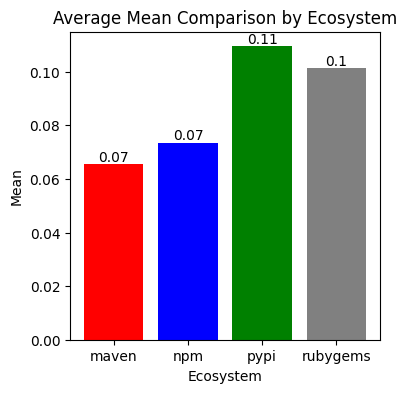

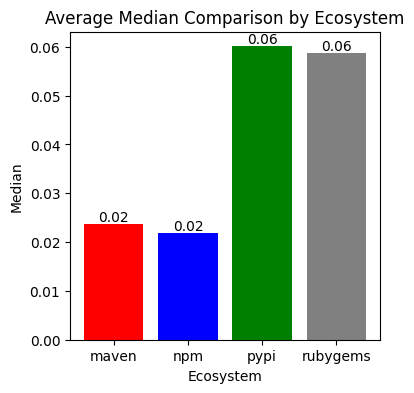

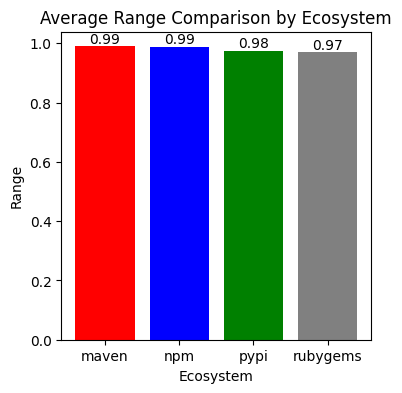

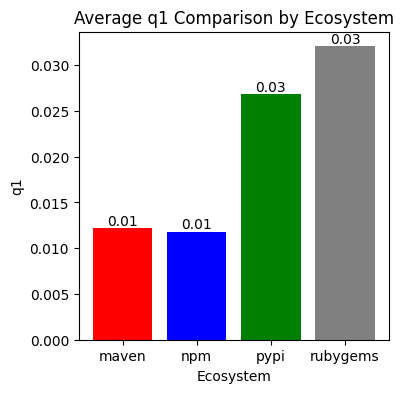

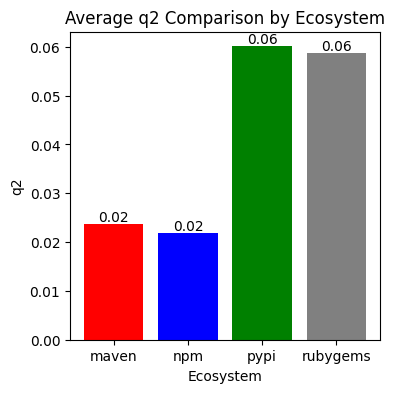

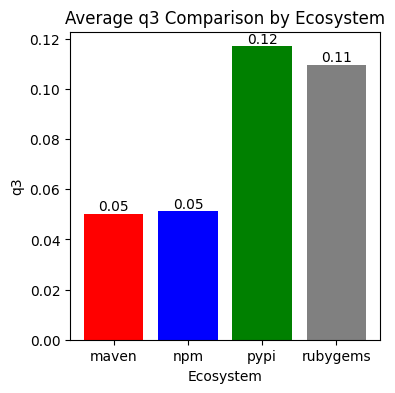

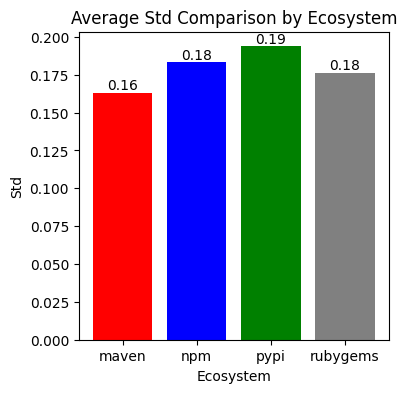

In [107]:
# Create bar plots for each metric
metrics = ['Mean', 'Median', 'Range', 'q1', 'q2', 'q3', 'Std']

for metric in metrics:
    plt.figure(figsize=(4, 4) )  # Adjust the figure size as needed
    bars = plt.bar(averages.index, averages[metric], color=['red', 'blue', 'green', 'gray'])
    plt.xlabel('Ecosystem')
    plt.ylabel(metric)
    plt.title(f'Average {metric} Comparison by Ecosystem')

    # Add values inside the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

    plt.show()